In [10]:
##Getting things set up
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
#import numpy as np



In [18]:
##Defining 3 optimzation problems###
#1- four peaks
length=10
fitness_fn1= mlrose.FourPeaks()
optprob1= mlrose.DiscreteOpt(length,fitness_fn1)

#2- sum of the 1 values
fitness_fn2= mlrose.OneMax()
optprob2= mlrose.DiscreteOpt(length,fitness_fn2) ##Should this be continuous???

#3- maxKcolor
edges= [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0), (0,8), (8,1), (8,2), (8,5), (8,6), (8,7), (9, 2), (9,3), (9,4), (9,5)]
fitness_fn3= mlrose.MaxKColor(edges)
optprob3=mlrose.DiscreteOpt(length,fitness_fn3)

In [41]:
#Run first problem through all 4 algorithms
[a, b, c]= mlrose.random_hill_climb(optprob1, curve=True)
#mlrose.simulated_annealing(optprob1, curve=True)
#mlrose.genetic_alg(optprob1, curve=True)
#mlrose.mimic(optprob1, curve=True)
a

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [61]:
#iterate to keep it simple
for optprob in [optprob1]: #, optprob2, optprob3]:
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, curve=True)
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True)
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, pop_size=2000, curve=True)
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob, pop_size=2000, curve=True)
    

print(gacurve)

[18. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.]


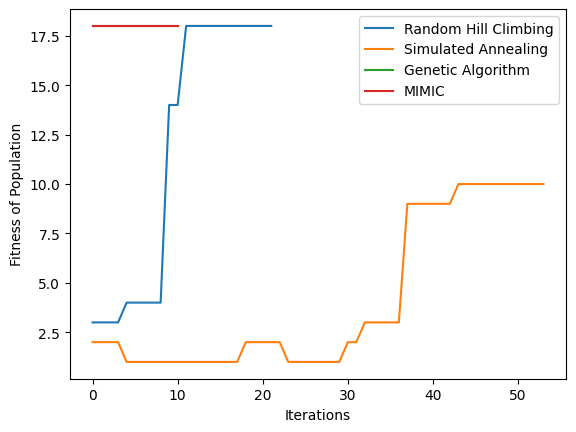

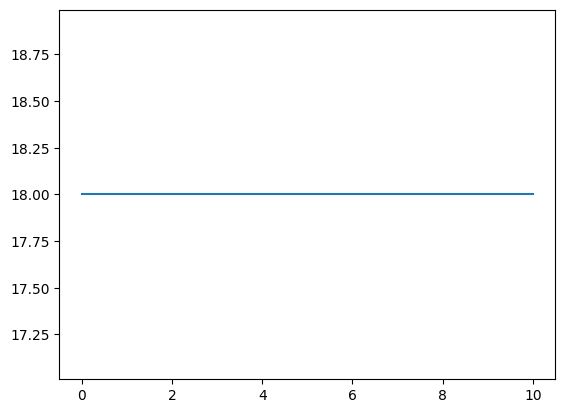

In [63]:
#plotting
import matplotlib.pyplot as plt
plt.plot(rhccurve)#, sacurve, gacurve, mimiccurve)
plt.plot(sacurve)
plt.plot(gacurve)
plt.plot(mimiccurve)
plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
plt.xlabel("Iterations")
plt.ylabel("Fitness of Population")
plt.show()